In [57]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from itertools import product
import time

In [68]:
df = pd.read_csv('genres.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_19288\705134588.py:1: DtypeWarning:

Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.



In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [60]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [61]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.\n')
df.isnull().sum() 

There are 42305 rows and 22 columns in dataset.



danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [62]:
# drop unnecessary features
df = df.drop(columns=['title', 'Unnamed: 0', 'id', 'uri', 'track_href', 'analysis_url'])  # axis=1
df = df.drop_duplicates()

print(f' {df.shape[0]} rows and {df.shape[1]} columns \n')
df.isnull().sum()

 38165 rows and 16 columns 



danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
duration_ms             0
time_signature          0
genre                   0
song_name           17084
dtype: int64

## EDA

In [63]:
print(f"Number of genres: {len(df['genre'].unique())}\n")

df["genre"].unique()

Number of genres: 15



array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [64]:
# Count of each genre
import plotly.express as px
px.histogram(df.genre)

## Preprocess the Data

In [65]:
# new dataframe with required features
df_x = df[df.columns[:11]]
df_x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988


In [66]:
df_new = df_x.copy()
df_new['genre'] = df['genre']
df_new['time_signature'] = df['time_signature']
df_new['duration_ms'] = df['duration_ms']

df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_ms
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,Dark Trap,4,124539
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,Dark Trap,4,224427
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,Dark Trap,4,98821
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,Dark Trap,3,123661
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,Dark Trap,4,123298


In [67]:
df_new['duration_min'] = df_new['duration_ms']/60000
df_new.drop('duration_ms',axis=1,inplace=True)

df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,Dark Trap,4,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,Dark Trap,4,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,Dark Trap,4,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,Dark Trap,3,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,Dark Trap,4,2.054967


### Correlation analysys

In [13]:
from sklearn.preprocessing import LabelEncoder
df2Corr = df_new.copy()
df2Corr['genre'] = LabelEncoder().fit_transform(df2Corr['genre'])
corrMx = df2Corr.corr()
corrMx.style.background_gradient(cmap = "RdBu_r")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_min
danceability,1.000000,-0.321428,-0.016433,-0.194027,0.074999,0.196465,0.065747,-0.096822,-0.196091,0.355751,-0.143740,-0.051019,0.058360,-0.068326
energy,-0.321428,1.000000,0.046879,0.598252,-0.029434,-0.150833,-0.491719,0.312258,0.235718,-0.006390,-0.024401,0.454330,0.039390,0.305150
key,-0.016433,0.046879,1.000000,-0.004615,-0.249584,-0.028919,-0.004163,0.067623,0.001323,0.025907,-0.007565,0.027895,0.007587,0.068717
loudness,-0.194027,0.598252,-0.004615,1.000000,0.001099,0.037581,-0.280425,-0.179991,0.163773,0.102673,0.139954,0.132334,0.045738,-0.082652
mode,0.074999,-0.029434,-0.249584,0.001099,1.000000,0.047462,-0.016273,-0.021803,0.011290,0.014947,-0.006323,-0.022463,-0.009587,-0.036733
speechiness,0.196465,-0.150833,-0.028919,0.037581,0.047462,1.000000,0.158272,-0.389221,0.052209,0.239759,0.166151,-0.153032,0.023291,-0.311190
acousticness,0.065747,-0.491719,-0.004163,-0.280425,-0.016273,0.158272,1.000000,-0.261954,-0.109839,0.101296,0.051668,-0.342175,-0.048757,-0.246822
instrumentalness,-0.096822,0.312258,0.067623,-0.179991,-0.021803,-0.389221,-0.261954,1.000000,-0.007648,-0.280526,-0.200685,0.428359,-0.011786,0.604687
liveness,-0.196091,0.235718,0.001323,0.163773,0.011290,0.052209,-0.109839,-0.007648,1.000000,-0.016906,0.025073,0.106962,0.002954,0.016078
valence,0.355751,-0.006390,0.025907,0.102673,0.014947,0.239759,0.101296,-0.280526,-0.016906,1.000000,0.083962,-0.176225,0.042049,-0.193279


##### There is no highly correlated values so won't drop any features

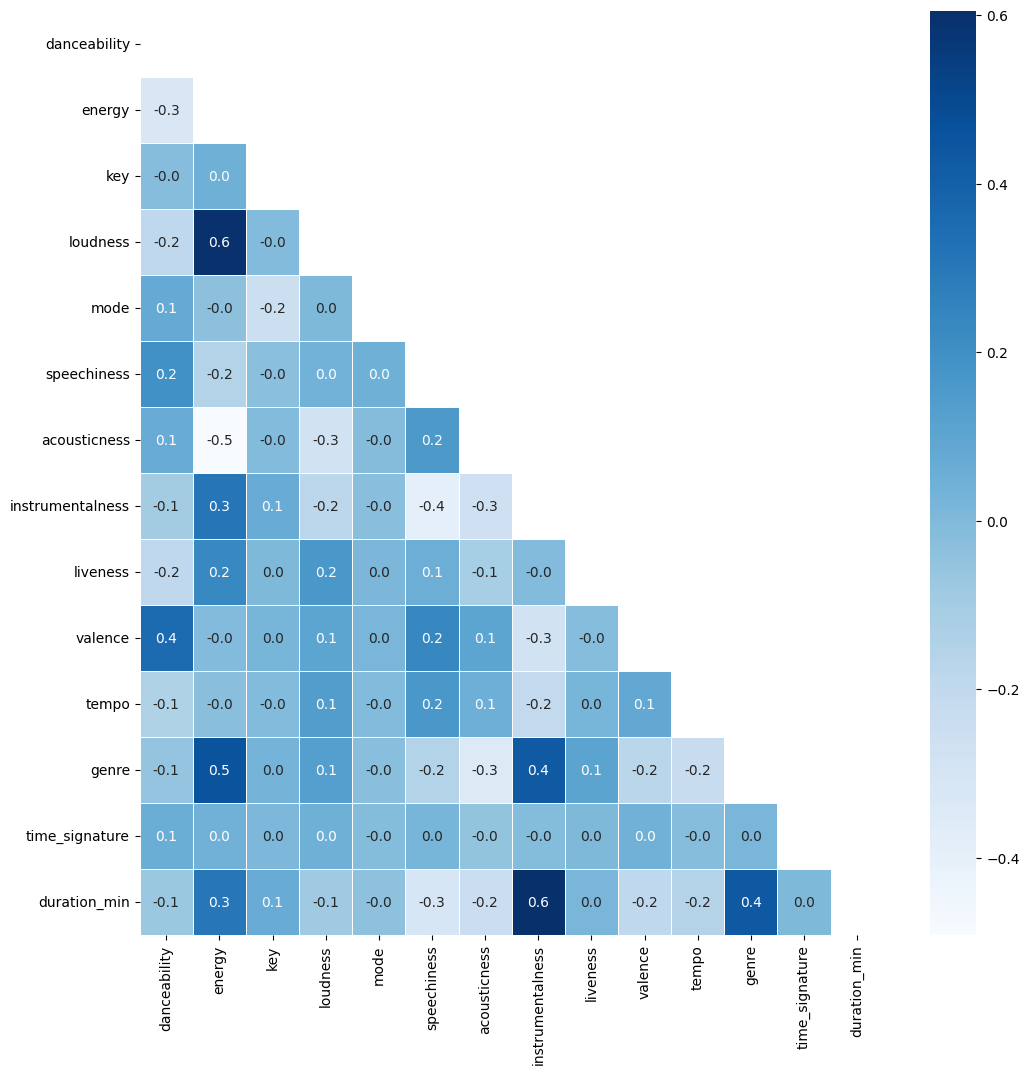

In [14]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df2Corr.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2Corr.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

### Feature Scaling and Normalization

In [15]:
from sklearn.preprocessing import LabelEncoder
df_new['genre_enco'] = LabelEncoder().fit_transform(df_new['genre'])
df_new['genre_enco'].value_counts()

genre_enco
7     5776
0     4522
2     2964
13    2734
12    2632
10    2610
8     2407
9     2277
14    2226
11    2192
5     2043
6     1910
4     1812
1     1608
3      452
Name: count, dtype: int64

In [16]:
X1 = df_new.drop(columns=['genre','genre_enco'])
Y1 = df_new["genre_enco"]
print(X1.shape)

(38165, 13)


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X1_std = StandardScaler().fit_transform(X1)

### SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X1, Y1 = smote.fit_resample(X1_std, Y1)

print(X1.shape)

(86640, 13)


## Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=.2, random_state=1, shuffle=True)

In [20]:
print(X_train.shape)
print(X_test.shape)

(69312, 13)
(17328, 13)


In [21]:
scoring = [['model','accuracy']]

### Bulding models

In [22]:
def buildModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # train model
    yhat = model.predict(X_test) # predict
    score = accuracy_score(y_test, yhat)
    return {
      "predict": yhat,
      "accuracy": score
    }

In [23]:
def modelCrossValidation(X, Y, algo):
    validation = KFold(n_splits=5, shuffle=True, random_state=1)
    statsNames = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'f1_macro']

    res = {}
    for sname in statsNames:
        res[sname] = round(cross_val_score(algo, X, Y, cv=validation, scoring=sname, n_jobs=-1).mean(), 4)
    return res

### Feature Importance

[0.07730471 0.05136137 0.02985438 0.05543991 0.03572474 0.05099368
 0.03715958 0.17309654 0.02102395 0.05244979 0.24571042 0.02663103
 0.14324991]


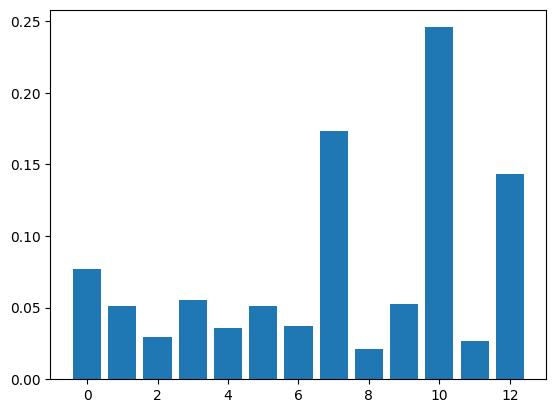

In [24]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)

print(model.feature_importances_)

pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

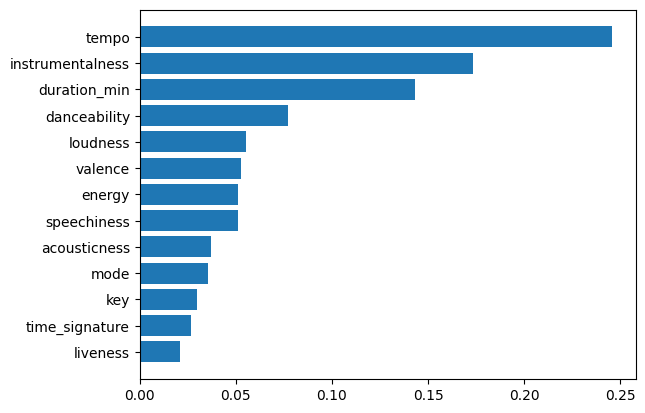

In [25]:
importance = model.feature_importances_
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.drop(columns=['genre','genre_enco']).columns)[indices])

### Model Selection

#### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=1000);
res_LR = buildModel(model_LR, X_train, X_test, y_train, y_test)

print(res_LR["accuracy"])

0.5822945521698984


#### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
res_NB = buildModel(model_NB, X_train, X_test, y_train, y_test)
print(res_NB["accuracy"])

0.5803901200369345


#### K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=4) # n_neighbors=3
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)

scoring.append(['KNeighbors', res_KNN["accuracy"]])
scoring[1]

['KNeighbors', 0.7759118190212373]

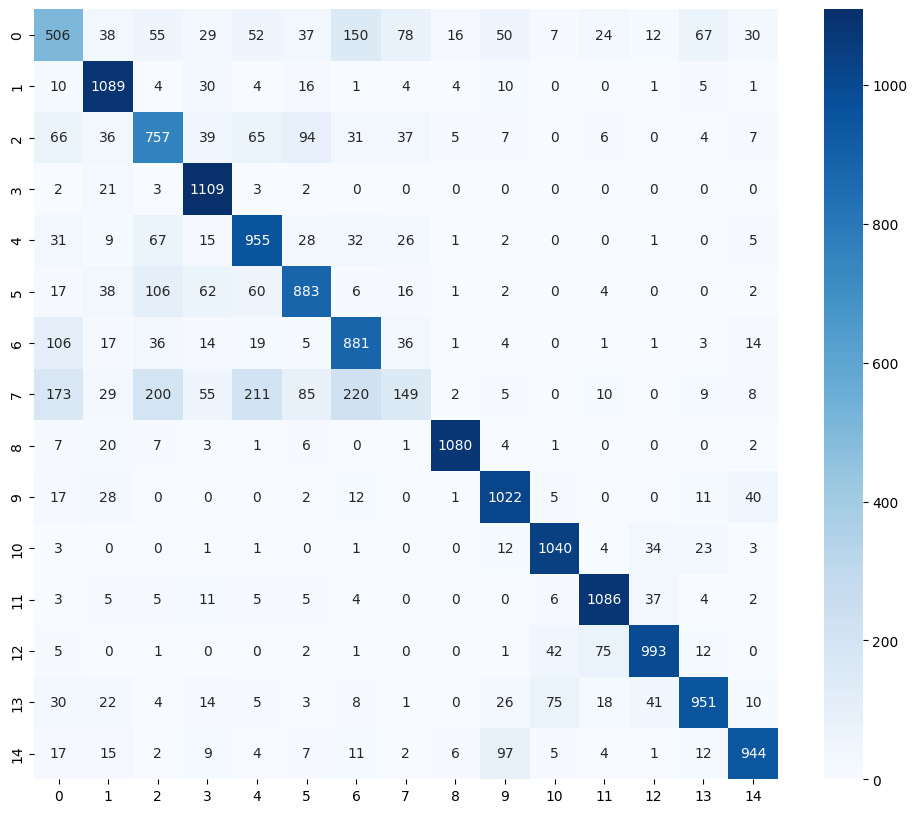

In [29]:
cm = confusion_matrix(y_test, res_KNN['predict'])
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
res_DT = buildModel(model_DT, X_train, X_test, y_train, y_test)
print(res_DT["accuracy"])

0.6381001846722069


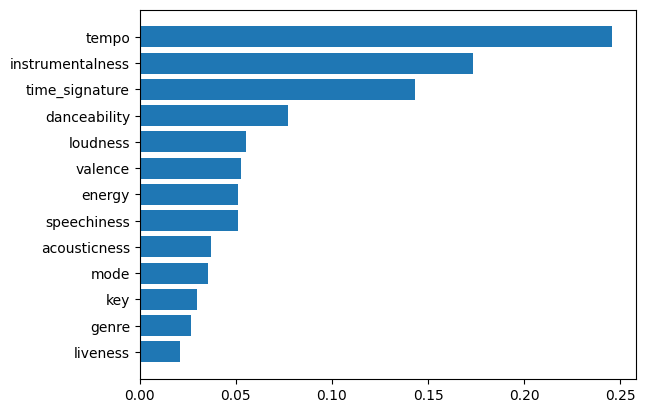

In [31]:
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.columns)[indices])

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train Accuracy 
k = 5
model_RF = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=3)
cv_score = cross_val_score(model_RF, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean())

# Test Accuracy
clf_RF = model_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['RandomForest', score_accuracy])

Cross_val Scores:  [0.79997115 0.79802352 0.79909104 0.79800895 0.79346415]
Train Accuracy(average): 0.7977117588419846
Test Accuracy: 0.8078831948291783


Feature: 0, Score: 0.09587
Feature: 1, Score: 0.07557
Feature: 2, Score: 0.03626
Feature: 3, Score: 0.08125
Feature: 4, Score: 0.01092
Feature: 5, Score: 0.07089
Feature: 6, Score: 0.06743
Feature: 7, Score: 0.09682
Feature: 8, Score: 0.05003
Feature: 9, Score: 0.07091
Feature: 10, Score: 0.21132
Feature: 11, Score: 0.00401
Feature: 12, Score: 0.12872


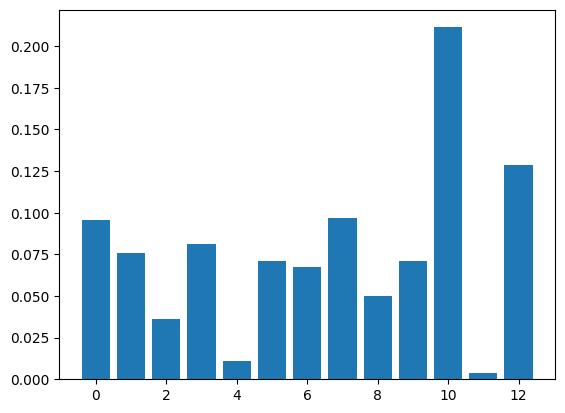

In [33]:
# get importance
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

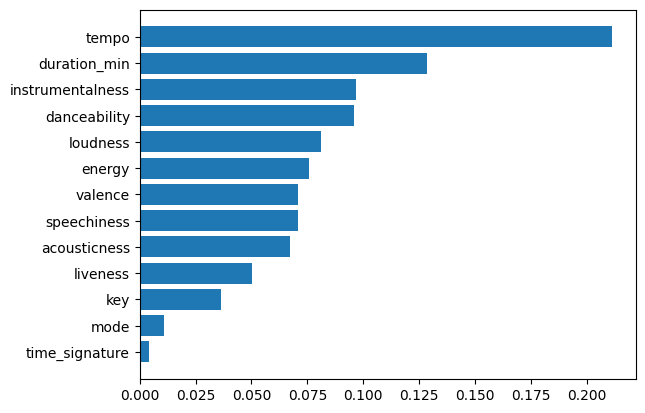

In [34]:
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.drop(columns=['genre','genre_enco']).columns)[indices])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53      1151
           1       0.90      0.89      0.90      1179
           2       0.66      0.64      0.65      1154
           3       0.89      0.94      0.91      1140
           4       0.71      0.77      0.74      1172
           5       0.75      0.78      0.76      1197
           6       0.64      0.72      0.68      1138
           7       0.37      0.29      0.33      1156
           8       0.98      0.99      0.98      1132
           9       0.92      0.96      0.94      1138
          10       0.96      0.96      0.96      1122
          11       0.93      0.95      0.94      1173
          12       0.92      0.92      0.92      1132
          13       0.91      0.92      0.91      1208
          14       0.90      0.92      0.91      1136

    accuracy                           0.81     17328
   macro avg       0.80      0.81      0.80     17328
weighted avg       0.80   

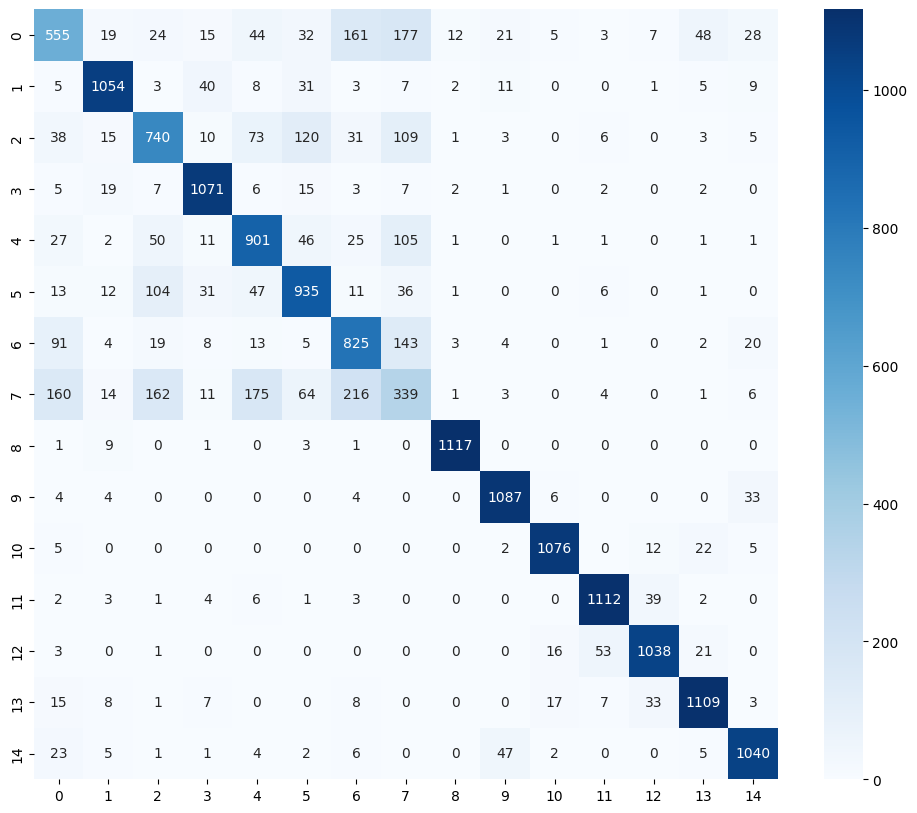

In [36]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### SVM

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

k = 3

# Train Accuracy 
model_svc = SVC(kernel="rbf", C=1000, gamma="scale") 
cv_score = cross_val_score(model_svc, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Test Accuracy
clf_svc = model_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['SVM', score_accuracy])

Cross_val Scores:  [0.78453947 0.78462604 0.78544841]
Train Accuracy(average): 0.7848713065558633
Test Accuracy: 0.8148661126500462


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53      1151
           1       0.90      0.93      0.91      1179
           2       0.65      0.67      0.66      1154
           3       0.93      0.98      0.95      1140
           4       0.71      0.81      0.76      1172
           5       0.78      0.77      0.77      1197
           6       0.68      0.78      0.73      1138
           7       0.35      0.24      0.28      1156
           8       0.98      0.98      0.98      1132
           9       0.92      0.95      0.94      1138
          10       0.96      0.95      0.95      1122
          11       0.93      0.94      0.94      1173
          12       0.91      0.92      0.91      1132
          13       0.92      0.89      0.90      1208
          14       0.93      0.92      0.93      1136

    accuracy                           0.81     17328
   macro avg       0.81      0.82      0.81     17328
weighted avg       0.81   

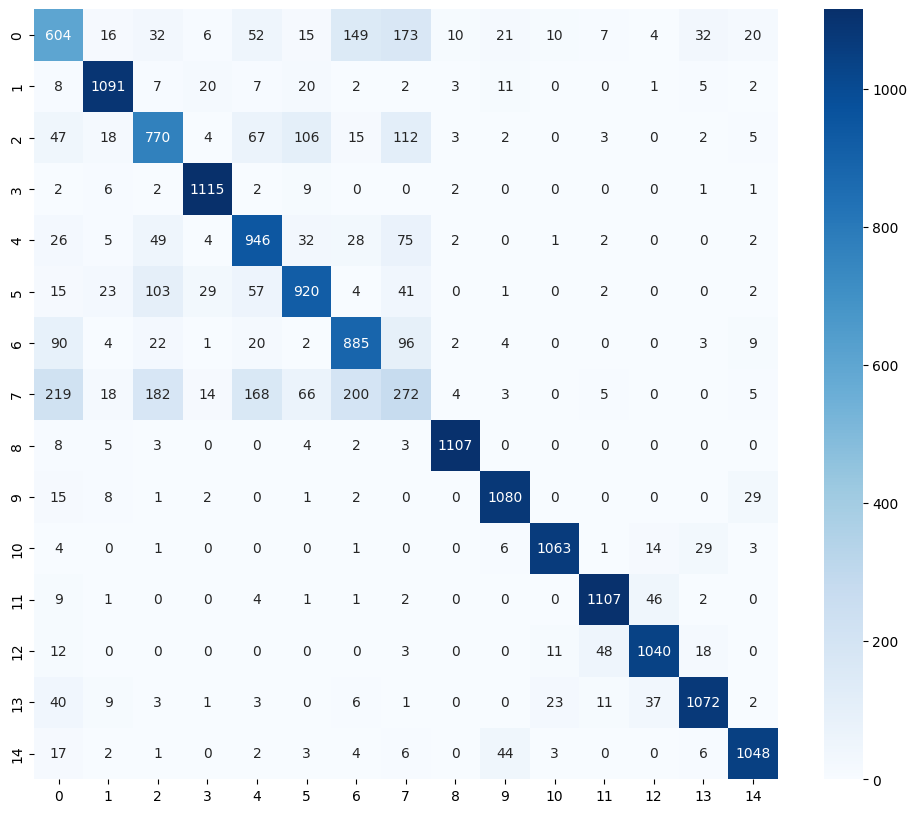

In [39]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
k = 5

# Train Accuracy 
model_Bag = BaggingClassifier()
cv_score = cross_val_score(model_Bag, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Test Accuracy
clf_bag = model_Bag.fit(X_train, y_train)
y_pred = clf_bag.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['Bagging', score_accuracy])

Cross_val Scores:  [0.74320133 0.74918849 0.74549127 0.74787188 0.7488097 ]
Train Accuracy(average): 0.7469125322491038
Test Accuracy: 0.7574445983379502


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1151
           1       0.81      0.85      0.83      1179
           2       0.56      0.56      0.56      1154
           3       0.81      0.89      0.85      1140
           4       0.67      0.70      0.68      1172
           5       0.68      0.66      0.67      1197
           6       0.59      0.64      0.61      1138
           7       0.27      0.21      0.24      1156
           8       0.97      0.98      0.97      1132
           9       0.88      0.93      0.91      1138
          10       0.95      0.94      0.94      1122
          11       0.90      0.94      0.92      1173
          12       0.90      0.89      0.90      1132
          13       0.89      0.87      0.88      1208
          14       0.89      0.86      0.88      1136

    accuracy                           0.76     17328
   macro avg       0.75      0.76      0.75     17328
weighted avg       0.75   

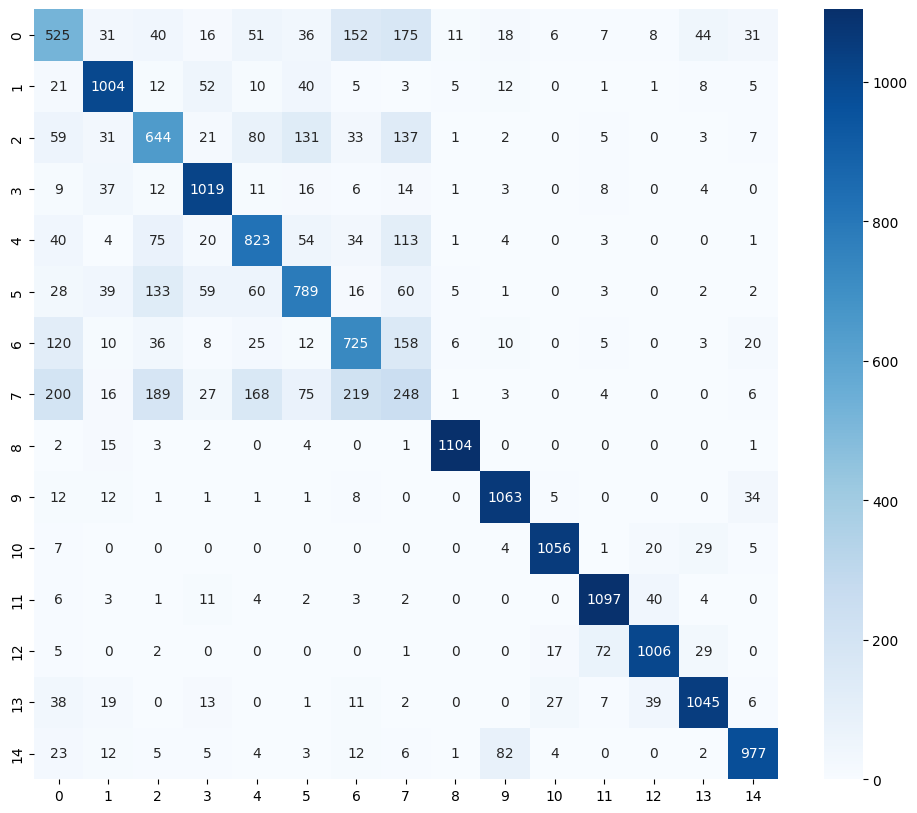

In [42]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

### Compare Model Result

In [43]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = scoring[0]

for i in range(len(scoring)):
    if i!=0:
        table.add_row(scoring[i])
print(table)

+--------------+--------------------+
|    model     |      accuracy      |
+--------------+--------------------+
|  KNeighbors  | 0.7759118190212373 |
| RandomForest | 0.8078831948291783 |
|     SVM      | 0.8148661126500462 |
|   Bagging    | 0.7574445983379502 |
+--------------+--------------------+


### Best/preferred model: SVM 